## Observations and Insights 

1 Capomulin and Ramicane both had more subjects per Timepoint throughout the study which may skew results.

2 Based on time analyis, it takes 20 days before Capomulin is effective & shows indication of the tumor developing a resistance to the drug  

3 Based on the summary statistics calculated, Capomulin shows the most promise in reducing tumor volumes.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
tumor_total = pd.merge(mouse_metadata, study_results, how ="left", on = ["Mouse ID", "Mouse ID"])
tumor_total.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice in the DataFrame.
id_count = tumor_total["Mouse ID"].count()
mice_count = tumor_total["Mouse ID"].nunique()
print(id_count)
print(mice_count)

1893
249


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = tumor_total[tumor_total.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_pull = tumor_total.loc[tumor_total['Mouse ID'] == 'g989']
duplicate_pull

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate timepoint records so there is one clean set of data for subject g989
clean_tumor = tumor_total.drop_duplicates(["Mouse ID", "Timepoint"])
clean_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_tumor["Mouse ID"].nunique()
print(clean_mouse_count)

249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    #Create a new dataframe with just Drug Regimen and Tumor volume data
tumor_vol = clean_tumor[['Drug Regimen', 'Tumor Volume (mm3)']]

summary_stats = tumor_vol.groupby(['Drug Regimen']).mean()
summary_stats = summary_stats.rename(columns= {'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
summary_stats['Median Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).median()
summary_stats['Variance Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).var()
summary_stats['Std. Dev. Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).std()
summary_stats['SEM Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).sem()

summary_stats.round(2)
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

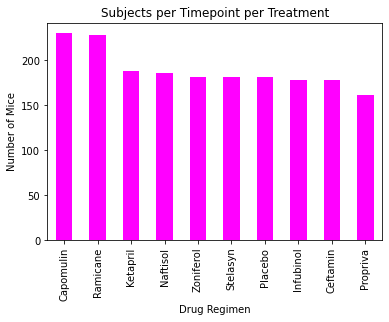

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
tumor_total['Drug Regimen'].value_counts().plot(kind="bar", facecolor="magenta")
plt.title("Subjects per Timepoint per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

Text(0, 0.5, 'Number of Mice per Treatment')

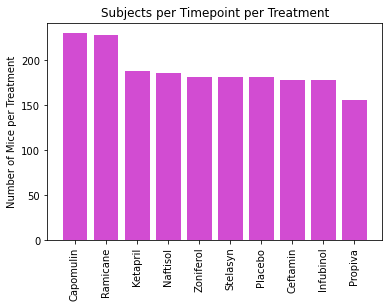

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propiva"]

y_axis = clean_tumor["Drug Regimen"].value_counts()
x_axis = regimens
plt.bar(x_axis, y_axis, color='m', alpha=0.7, align='center')
plt.xticks(rotation = 'vertical')
plt.title("Subjects per Timepoint per Treatment")
plt.ylabel("Number of Mice per Treatment")

## Pie Plots

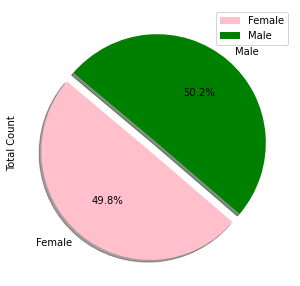

In [9]:
# Create a new dataframe with just 'Mouse ID' and 'Sex' data
mice_chart = clean_tumor.groupby(['Mouse ID', 'Sex'])

# Find unique values
sex_count_df = pd.DataFrame(mice_chart.size())

# Create another dataframe that shows total count and percentage of male vs female
sex_count = pd.DataFrame(sex_count_df.groupby(["Sex"]).count())
sex_count.columns = ["Total Count"]

sex_count["Gender Distribution"] = (100*(sex_count["Total Count"]/sex_count["Total Count"].sum()))
sex_count
                         
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'green']
explode = (0.1, 0)
mouse_pie = sex_count.plot.pie(y='Total Count',figsize=(5,5), colors= colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

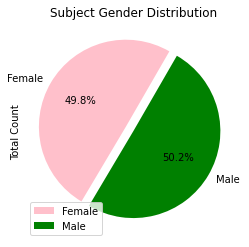

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_pie = sex_count.plot(kind="pie", y='Total Count', colors = ['pink', 'green'], startangle=60, explode = explode, autopct="%1.1f%%", title=("Subject Gender Distribution"))


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Pull data for each regimen of interest
top_drugs1 = clean_tumor[clean_tumor['Drug Regimen'] == "Capomulin"]
top_drugs2 = clean_tumor[clean_tumor['Drug Regimen'] == "Ramicane"]
top_drugs3 = clean_tumor[clean_tumor['Drug Regimen'] == "Infubinol"]
top_drugs4 = clean_tumor[clean_tumor['Drug Regimen'] == "Ceftamin"]

# Pull the last final tumor volume timepoint for each subject
cap_vol = top_drugs1.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
ram_vol = top_drugs2.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
fub_vol = top_drugs3.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
cef_vol = top_drugs4.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])

# Pull just Tumor volume data
cap_final = cap_vol['Tumor Volume (mm3)']
ram_final = ram_vol['Tumor Volume (mm3)']
fub_final = fub_vol['Tumor Volume (mm3)']
cef_final = cap_vol['Tumor Volume (mm3)']

#Calculate Quartiles, IQR and Bounds
cap_quarts = cap_vol.quantile([.25, .5, .75])
cap_lq = cap_quarts.loc[0.25, "Tumor Volume (mm3)"]
cap_med = cap_quarts.loc[0.5, "Tumor Volume (mm3)"]
cap_uq = cap_quarts.loc[0.75, "Tumor Volume (mm3)"]
cap_iqr = cap_uq - cap_lq

cap_lower = cap_lq - (1.5 * cap_iqr)
cap_upper = cap_uq + (1.5 * cap_iqr)

print(f"The Lower Quartile of occupancy is: {cap_lq}")
print(f"The Upper Quartile of occupancy is: {cap_uq}")
print(f"The Interquartile Range of occupancy is: {cap_iqr}")
print(f"The Median of occupancy is : {cap_med}")
print(f"Values below {cap_lower} could be outliers.")
print(f"Values above {cap_upper} could be outliers.")

The Lower Quartile of occupancy is: 32.37735684
The Upper Quartile of occupancy is: 40.1592203
The Interquartile Range of occupancy is: 7.781863460000004
The Median of occupancy is : 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


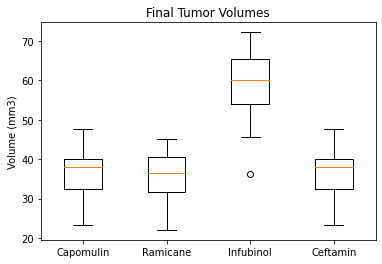

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Volume (mm3)')
tumor_whisk = plt.boxplot([cap_final, ram_final, fub_final, cef_final], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

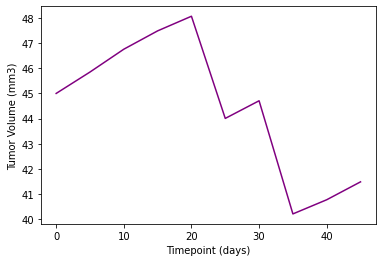

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
subject_isolate = clean_tumor[clean_tumor['Mouse ID'] == "l509"]

plt.plot(subject_isolate['Timepoint'], subject_isolate['Tumor Volume (mm3)'], color ="purple", label="Tumor Vol.")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

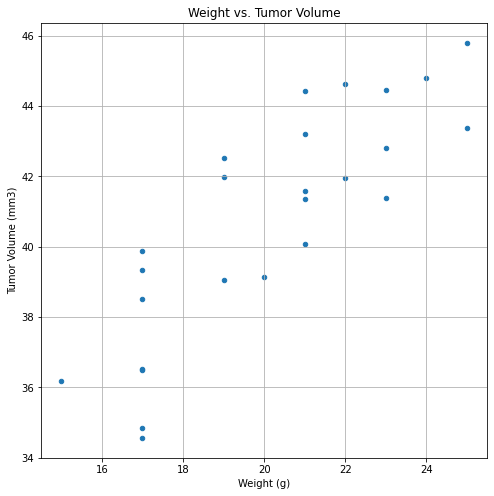

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_isolate = clean_tumor.loc[clean_tumor['Drug Regimen'] == "Capomulin"]
cap_isolate = drug_isolate.groupby('Mouse ID').mean()

cap_isolate.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
title="Weight vs. Tumor Volume")

plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_isolate['Weight (g)']
y_values = cap_isolate['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="orange")
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume')
plt.show()

TypeError: 'module' object is not callable